In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = open("./SMSSpamCollection.txt")
data = file.readlines()
file.close()
print("No. of email messages:", len(data))

No. of email messages: 5574


In [3]:
x=[]
y=[]
for line in data:
    splitted_data = line.split('\t')
    if len(splitted_data)==2:
        y.append(splitted_data[0])
        x.append(splitted_data[1].replace('\n',''))

In [4]:
len(x),len(y)

(5574, 5574)

In [5]:
df = pd.DataFrame({'email_messages':x, 'labels':y})

In [6]:
df

,email_messages,labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,spam
5570,Will ü b going to esplanade fr home?,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham


In [7]:
pd.read_table("./SMSSpamCollection.txt")

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [8]:
value_counts = df['labels'].value_counts()

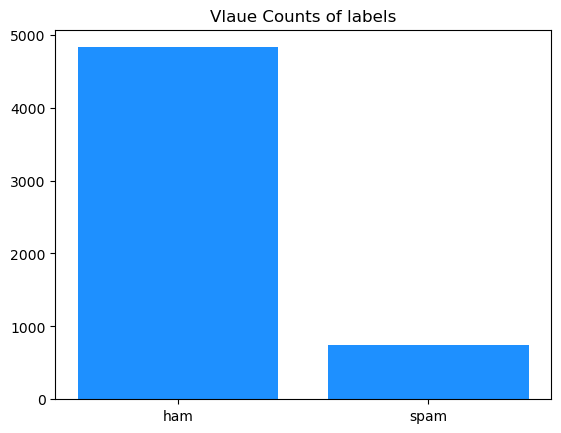

In [9]:
plt.bar(value_counts.index,value_counts.values,color='dodgerblue')
plt.title("Vlaue Counts of labels")
plt.show()

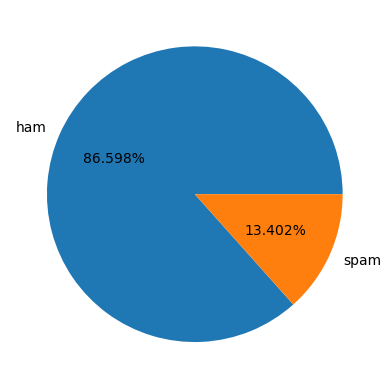

In [10]:
plt.pie(value_counts.values,labels=value_counts.index,autopct='%2.3f%%')
plt.show()

In [11]:
ham = df[df['labels']=='ham']
spam = df[df['labels']=='spam']

In [12]:
spam.shape,ham.shape

((747, 2), (4827, 2))

In [13]:
HAM = ham.sample(1000) ##random sampling

In [14]:
HAM.shape

(1000, 2)

In [15]:
balance_df = pd.concat([spam,HAM])

In [16]:
value_counts = balance_df['labels'].value_counts()
value_counts

labels
ham     1000
spam     747
Name: count, dtype: int64

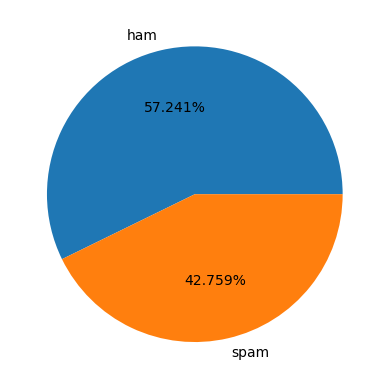

In [17]:
plt.pie(value_counts.values,labels=value_counts.index,autopct='%2.3f%%')
plt.show()

In [18]:
balance_df.head()

,email_messages,labels
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
5,FreeMsg Hey there darling it's been 3 week's n...,spam
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam
11,"SIX chances to win CASH! From 100 to 20,000 po...",spam


In [19]:
balance_df.reset_index(drop=True,inplace=True)

In [20]:
import re #resgular expression

In [21]:
balance_df['email_messages'][0]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [22]:
for i in range(len(balance_df)): 
    lower_message = balance_df['email_messages'][i].lower()
    clean_message = re.sub('[^a-zA-Z ]',"",lower_message)  # substitud  
    balance_df['email_messages'][i] = clean_message 

C:\Users\Abhipsa Srivastava\AppData\Local\Temp\ipykernel_19028\2053669802.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  balance_df['email_messages'][i] = clean_message


In [23]:
balance_df['email_messages'][0]

'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs'

In [24]:
x=balance_df['email_messages']
y=balance_df['labels']

In [25]:
X=x.values #changed into numpy array

In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer  
## to convert text data to numerical representation 

class sklearn.feature_extraction.text.TfidfVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

-->Convert a collection of raw documents to a matrix of TF-IDF features.

Equivalent to CountVectorizer followed by TfidfTransformer.

For an example of usage, see Classification of text documents using sparse features.

For an efficiency comparison of the different feature extractors, see FeatureHasher and DictVectorizer Comparison.

For an example of document clustering and comparison with HashingVectorizer, see Clustering text documents using k-means.

In [27]:
bow_obj = CountVectorizer(max_features=500,stop_words='english')

In [28]:
x_transformed = bow_obj.fit_transform(X)
x_transformed

<1747x500 sparse matrix of type '<class 'numpy.int64'>'
	with 9467 stored elements in Compressed Sparse Row format>

In [29]:
X.shape

(1747,)

In [30]:
X2=x_transformed.toarray()

In [31]:
dt = {'spam':1,'ham':0}
Y = y.map(dt)

In [32]:
import random

In [33]:
ls = [25,50,75,100]
random.shuffle(ls)
ls

[25, 50, 75, 100]

In [34]:
# training testing split 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(X2,Y,test_size=0.10,)

In [35]:
x_train[0][0:500]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
# algorithm training  naive bayes 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
## randomforest, decisiontree , logisticregression 

In [37]:
mnb = MultinomialNB()
bnb = BernoulliNB()

In [40]:
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)
print("Training completed")

Training completed


In [41]:
## score checkout  
print("MultinomialNB")
print("Training score : ",mnb.score(x_train,y_train)*100)
print("Testing score : ",mnb.score(x_test,y_test)*100)

print()
print("BernoulliNB")
print("Training score : ",bnb.score(x_train,y_train)*100)
print("Testing score : ",bnb.score(x_test,y_test)*100)

MultinomialNB
Training score :  94.59287531806616
Testing score :  94.85714285714286

BernoulliNB
Training score :  94.78371501272265
Testing score :  96.0


In [42]:
## PREDICTION
prediction = bnb.predict(x_test)
prediction

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [43]:
#actual
np.array(y_test)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [44]:
evaluate_df = pd.DataFrame({'Actual':np.array(y_test),'prediction':prediction})
evaluate_df.head(40)



,Actual,prediction
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,1,1
6,0,0
7,0,0
8,1,1
9,0,0


In [45]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(evaluate_df['Actual'],evaluate_df['prediction'])
matrix

array([[100,   2],
       [  5,  68]], dtype=int64)

In [46]:
print(classification_report(evaluate_df['Actual'],evaluate_df['prediction']))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       102
           1       0.97      0.93      0.95        73

    accuracy                           0.96       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175



In [55]:
import os
if not os.path.exists("model"):
	os.mkdir("model")

In [51]:
import joblib
joblib.dump(bnb,"model/spam_classifier.pkl")

['model/spam_classifier.pkl']